In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import datetime
import glob
import os

headers = ["Date", "Price", "Postcode"]
files = ["RG30","RG315","RG316"]
start = datetime.datetime(2022, 1, 1)
end = datetime.datetime(2023, 12, 31)
df = pd.concat(
    (pd.read_csv(f"./{file}.csv", usecols=headers).assign(Source=file) for file in files), 
    ignore_index=True
)
# df = df[(df.Postcode.str.startswith("RG31"))]
df = df[(df.Price < 2000000)]
df.Date = pd.to_datetime(df.Date, errors='coerce')
df = df[(df.Date > start) & (df.Date < end)]
df.Price = pd.to_numeric(df.Price).div(1000)
df = df.sort_values(by=['Date'])

df30 = df[(df.Source == "RG30")]
df315 = df[(df.Source == "RG315")]
df316 = df[(df.Source == "RG316")]

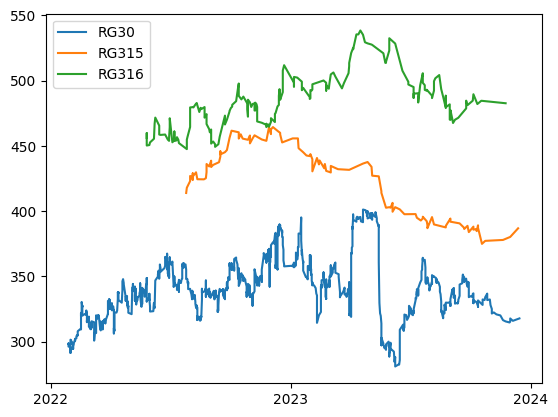

In [106]:
#plt.plot(df.Date, df.Price.rolling(400).mean(), label="All")
plt.plot(df30.Date, df30.Price.rolling(50).mean(), label="RG30")
plt.plot(df315.Date, df315.Price.rolling(50).mean(), label="RG315")
plt.plot(df316.Date, df316.Price.rolling(50).mean(), label="RG316")
plt.gca().xaxis.set_major_locator(YearLocator())
plt.legend()
plt.show()

In [98]:
monthly_counts = df.resample('ME', on='Date').size()
monthly_counts_30 = df30.resample('ME', on='Date').size()
monthly_counts_315 = df315.resample('ME', on='Date').size()
monthly_counts_316 = df316.resample('ME', on='Date').size()
print(monthly_counts.tail(24))

Date
2022-01-31     75
2022-02-28     83
2022-03-31     69
2022-04-30     71
2022-05-31     88
2022-06-30     71
2022-07-31     78
2022-08-31    101
2022-09-30     78
2022-10-31     95
2022-11-30     90
2022-12-31     74
2023-01-31     77
2023-02-28     67
2023-03-31     63
2023-04-30     48
2023-05-31     59
2023-06-30     50
2023-07-31     58
2023-08-31     62
2023-09-30     68
2023-10-31     34
2023-11-30     11
2023-12-31      6
Freq: ME, dtype: int64


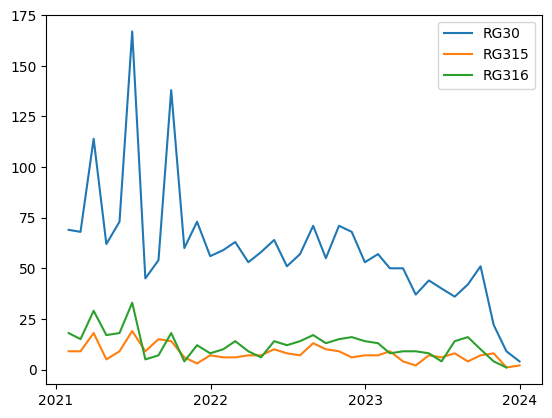

In [100]:
plt.plot(monthly_counts_30, label="RG30")
plt.plot(monthly_counts_315, label="RG315")
plt.plot(monthly_counts_316, label="RG316")
plt.gca().xaxis.set_major_locator(YearLocator())
plt.legend()
plt.show()